In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:/Users/ATAISH NEHRA/Downloads/Hydrowaste UTF.csv" 
data = pd.read_csv(file_path)

In [2]:
# Handling Missing Values: Fill missing values with the median for numerical columns and the mode for categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)
    
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [3]:
# Checking for duplicates
duplicate_rows = data.duplicated().sum()
print(f'Duplicate Rows: {duplicate_rows}')

Duplicate Rows: 0


In [4]:
# Simplified Outlier Identification (Awareness Only)
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0] / df.shape[0] * 100  # percentage of outliers

In [5]:
# Key numerical columns for outlier analysis
numerical_features_to_scale = ['POP_SERVED', 'WASTE_DIS', 'DESIGN_CAP', 'DF', 'RIVER_DIS']
outlier_percentages = {col: identify_outliers(data, col) for col in numerical_features_to_scale}
print("Percentage of outliers in key numerical columns:")
print(outlier_percentages)

Percentage of outliers in key numerical columns:
{'POP_SERVED': 14.97042836142354, 'WASTE_DIS': 14.230282725376911, 'DESIGN_CAP': 15.695189908037332, 'DF': 17.240436224402583, 'RIVER_DIS': 17.021640285802196}


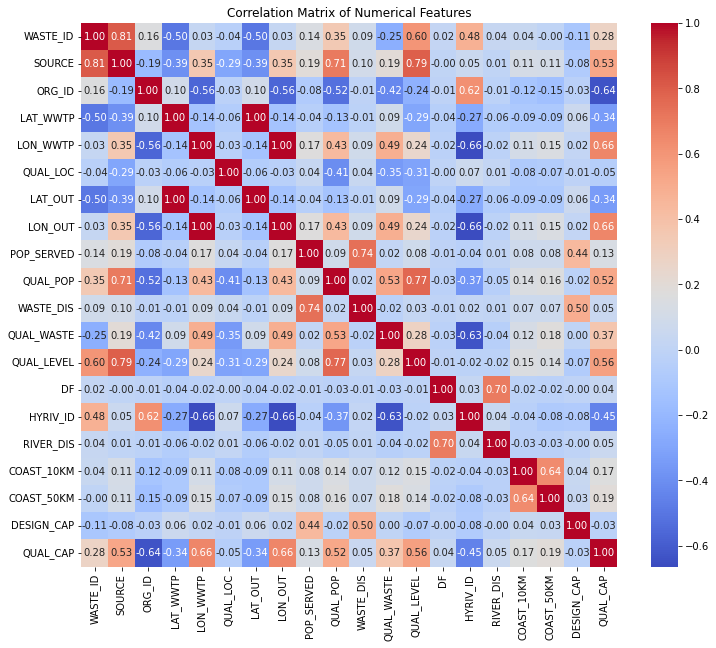

In [6]:
# Select numerical columns for the correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The correlation matrix heatmap above provides a visual representation of the linear relationships between pairs of numerical features in the dataset. Here are some insights and interpretations from the matrix: 

<br/>Strong Correlations: <br/>High absolute values (close to 1 or -1) indicate strong positive or negative correlations. For instance, if two variables such as POP_SERVED (population served) and WASTE_DIS (waste disposed) showed a strong positive correlation, it would imply that as the population served increases, the amount of waste disposed of also increases proportionally.<br/>

<br/>Weak or No Correlations: <br/>Values close to 0 indicate a weak or no linear relationship between variables. This doesn't necessarily mean the variables are unrelated but rather that the relationship may not be linear or may be influenced by other factors.

#### Bar Plot: Frequency of Different Statuses <br/> 
This bar plot shows how many waste management facilities fall into each status category. It's a straightforward way to visualize the distribution of facilities based on operational status, compliance, or other categorizations relevant to waste managementment.

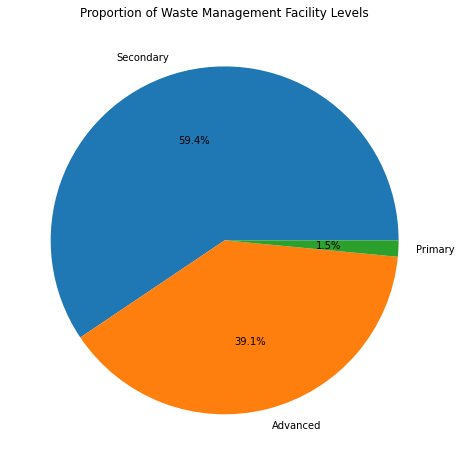

In [7]:
# Pie Chart for a Categorical Variable (e.g., 'LEVEL')
plt.figure(figsize=(8, 8))
data['LEVEL'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Waste Management Facility Levels')
plt.ylabel('')  # Hide the y-label as it's unnecessary for pie charts
plt.show()

#### Pie Chart: Proportion of Facility Levels
<br/> The pie chart visualizes the proportion of facilities at different levels of waste processing capabilities (e.g., primary, secondary, advanced treatment). It provides a clear picture of the landscape of waste management infrastructure in terms of technological sophistication or treatment level.

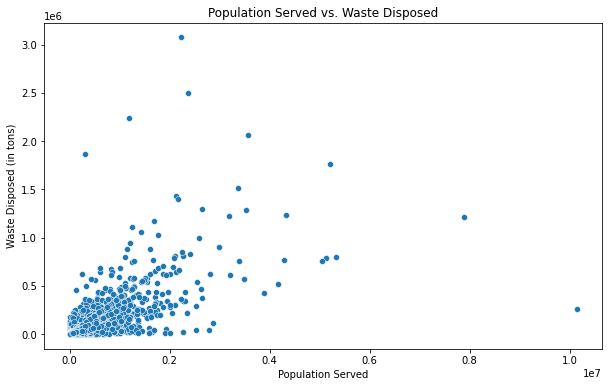

In [8]:
# Scatter Plot for Two Numerical Variables (e.g., 'POP_SERVED' vs. 'WASTE_DIS')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='POP_SERVED', y='WASTE_DIS', data=data)
plt.title('Population Served vs. Waste Disposed')
plt.xlabel('Population Served')
plt.ylabel('Waste Disposed (in tons)')
plt.show()

#### Scatter Plot: Population Served vs. Waste Disposed
<br/> The scatter plot explores the relationship between the population served by waste management facilities and the amount of waste they dispose of. It can reveal patterns, such as whether larger populations correlate with higher waste production, which is vital for planning waste management strategies and infrastructure development.

In [9]:
# Define the path where you want to save the new dataset
save_path = "C:/Users/ATAISH NEHRA/Downloads/UML Project/cleaned.csv"

# Save the DataFrame to a CSV file
data.to_csv(save_path, index=False)

In [10]:
file_path = "C:/Users/ATAISH NEHRA/Downloads/UML Project/cleaned.csv" 
data1 = pd.read_csv(file_path)

In [11]:
data1

,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,4,Advanced,1,2421.9740,20228874.0,4.153,0,0,4600.0,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,1,Advanced,1,2534.5270,20261585.0,257.983,0,0,220000.0,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1,Advanced,1,1367.8090,20243105.0,30.995,0,0,33000.0,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.210,...,1,Secondary,1,2061.9690,20247446.0,13.799,0,0,4357.0,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,4,Secondary,1,209.5490,20239330.0,0.405,0,0,1490.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58497,58498,12,5648,Jiangsu,Russia,RUS,71.640,128.855,1,71.644,...,4,Secondary,2,569.6175,30032708.0,6.544,1,1,4200.0,3
58498,58499,12,5649,Jiangsu,Kenya,KEN,-0.711,34.823,1,-0.769,...,4,Secondary,2,7.5020,11015070.0,4.467,0,1,4200.0,3
58499,58500,12,5650,Jiangsu,Turkey,TUR,37.860,27.842,1,37.798,...,4,Secondary,2,156.9130,20660889.0,48.421,0,0,4200.0,3
58500,58501,12,5651,Jiangsu,Russia,RUS,60.080,29.949,1,60.090,...,4,Secondary,2,569.6175,20162898.0,6.544,1,1,4200.0,3


In [13]:
# Confirming that new dataset has no missing values


missing_values = data1.isnull().sum()

missing_values

WASTE_ID      0
SOURCE        0
ORG_ID        0
WWTP_NAME     0
COUNTRY       0
CNTRY_ISO     0
LAT_WWTP      0
LON_WWTP      0
QUAL_LOC      0
LAT_OUT       0
LON_OUT       0
STATUS        0
POP_SERVED    0
QUAL_POP      0
WASTE_DIS     0
QUAL_WASTE    0
LEVEL         0
QUAL_LEVEL    0
DF            0
HYRIV_ID      0
RIVER_DIS     0
COAST_10KM    0
COAST_50KM    0
DESIGN_CAP    0
QUAL_CAP      0
dtype: int64